## Yol Haritası

### Anormal Verilerin Tespit Edilmesi

1.1 **İstatistiksel Yöntemlerle Tespit**
   - Z-skoru, IQR (Interquartile Range) kullanarak anormal değerleri belirleme.
   - Örneğin: Z-skoru 3'ten büyük veya küçük olan değerler anormal kabul edilebilir.

1.2 **Görsel Yöntemlerle Tespit**
   - Histogram, kutu grafikleri (box plot) ve dağılım grafikleri (scatter plot) kullanarak verilerdeki anormallikleri görsel olarak tespit etme.

1.3 **Domain Bilgisi Kullanarak Tespit**
   - Verilerin anlamlı olup olmadığını değerlendirmek için iş bilgisi ve deneyimi kullanma. Örneğin: Negatif yaş verileri.

#### 2. Hatalı Verilerin Tespiti

2.1 **Veri Türü Doğrulaması**
   - Sütunların veri tiplerinin uygun olup olmadığını kontrol etme. Örneğin: Tarih formatında olması gereken bir sütunda string değerler bulunması.

2.2 **İş Mantığı Kontrolü**
   - İş kurallarına aykırı verileri tespit etme. Örneğin: Bir sipariş tarihi, teslim tarihinden sonra olamaz.

2.3 **Benzer Veri Kümeleri ile Karşılaştırma**
   - Aynı verisetinin farklı kaynaklarla tutarlılığını karşılaştırma. Örneğin: Aynı müşteri ID'sine sahip kayıtlar arasında tutarsızlıklar.

#### 3. Anormal ve Hatalı Verilerin Düzeltilmesi

3.1 **Eksik Verilerin Doldurulması**
   - Mean, median, mode gibi istatistiksel yöntemler kullanarak eksik verileri doldurma.
   - Domain bilgisine dayanarak uygun değerlerle eksik verileri doldurma.

3.2 **Yanlış Verilerin Düzeltilmesi**
   - Hatalı verileri doğru verilerle değiştirme. Örneğin: Yanlış yazılmış isimler veya hatalı tarih formatları.
   - Veri türünü uygun formata çevirme. Örneğin: String olarak kaydedilmiş sayısal verileri integer veya float'a çevirme.

3.3 **Outlier'ların İşlenmesi**
   - Anormal değerleri ayıklama veya dönüştürme. Örneğin: Anormal derecede büyük veya küçük değerleri sınırlandırma.
   - Veriye dayalı olarak outlier'ları normal değerlerle değiştirme.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Anormal Verilerin Tespiti
# Z-Score yöntemiyle tespit
def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    return np.where(np.abs(z_scores) > threshold)

# IQR yöntemiyle tespit
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))

# Görsel Yöntemlerle Tespit
def plot_boxplot(data, column):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Hatalı Verilerin Tespiti
def validate_data_types(data, column, expected_type):
    return data[~data[column].apply(lambda x: isinstance(x, expected_type))]

# Eksik Verilerin Doldurulması
def fill_missing_values(data, column, strategy='mean'):
    if strategy == 'mean':
        data[column].fillna(data[column].mean(), inplace=True)
    elif strategy == 'median':
        data[column].fillna(data[column].median(), inplace=True)
    elif strategy == 'mode':
        data[column].fillna(data[column].mode()[0], inplace=True)

# Yanlış Verilerin Düzeltilmesi
def correct_data(data, column, correction_function):
    data[column] = data[column].apply(correction_function)

# Outlier'ların İşlenmesi
def handle_outliers(data, column, method='remove'):
    if method == 'remove':
        data = data[(np.abs(data[column] - data[column].mean()) <= (3 * data[column].std()))]
    elif method == 'cap':
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

### Örnek kullanımlar

```Python
df = pd.read_csv('data.csv')

outliers_zscore = detect_outliers_zscore(df['column_name'])

outliers_iqr = detect_outliers_iqr(df['column_name'])

plot_boxplot(df, 'column_name')

invalid_data = validate_data_types(df, 'column_name', expected_type=int)

fill_missing_values(df, 'column_name', strategy='mean')

correct_data(df, 'column_name', lambda x: x if x >= 0 else 0)

df = handle_outliers(df, 'column_name', method='cap')
```

## Customers

In [1]:
import pandas as pd 

df = pd.read_csv("../Database/customers.csv")
df.head(3)

,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,id
0,Land of Toys Inc.,2125557818,897 Long Airport Avenue,Bilinmiyor,NYC,NY,10022,USA,Bilinmiyor,Yu,Kwai,1
1,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Bilinmiyor,Reims,Bilinmiyor,51100,France,EMEA,Henriot,Paul,2
2,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Bilinmiyor,Paris,Bilinmiyor,75508,France,EMEA,Da Cunha,Daniel,3


Müşterilere ilişkin anormal veri tespit etme kısmı pas geçilecek zira her bilgi unique düzeyde. Verilerin ön işlenerek düzgün bir kalıba sokulması kısmı farklı bir task içerisinde tamamlanacak.

# Products

In [2]:
df = pd.read_csv("../Database/products.csv")
df.head(3)

,PRODUCTCODE,PRODUCTLINE,MSRP
0,S10_1678,Motorcycles,95
1,S10_1949,Classic Cars,214
2,S10_2016,Motorcycles,118


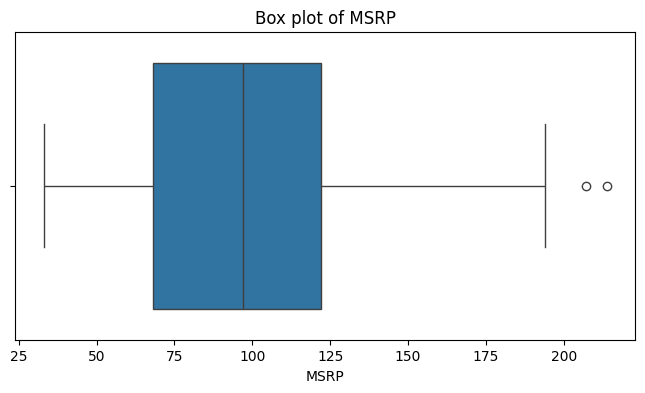

In [12]:
plot_boxplot(df, "MSRP")

In [20]:
outliers = detect_outliers_iqr(df["MSRP"])
print(outliers)
df["MSRP"].iloc[outliers]

(array([1, 7]),)


1    214
7    207
Name: MSRP, dtype: int64

## Orders

In [21]:
df = pd.read_csv("../Database/orders.csv")
df.head(3)

,ORDERNUMBER,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,DEALSIZE,customer_id
0,10107,2/24/2003 0:00,Shipped,1,2,2003,Small,1
1,10121,5/7/2003 0:00,Shipped,2,5,2003,Small,2
2,10134,7/1/2003 0:00,Shipped,3,7,2003,Medium,3


## Order Items

In [22]:
df = pd.read_csv("../Database/order_items.csv")
df.head(3)

,ORDERNUMBER,PRODUCTCODE,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES
0,10107,S10_1678,30,95.70,2,2871.00
1,10121,S10_1678,34,81.35,5,2765.90
2,10134,S10_1678,41,94.74,2,3884.34


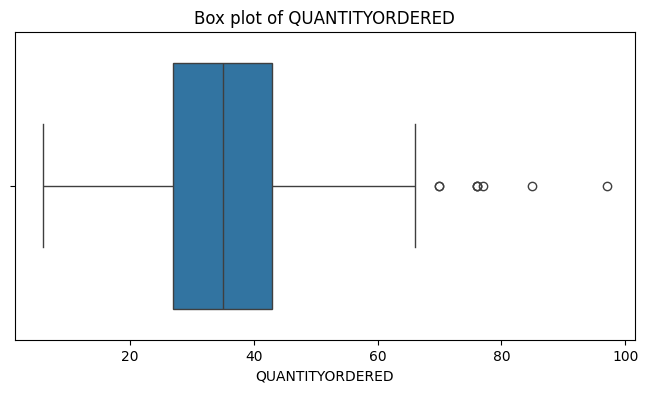

In [23]:
plot_boxplot(df, "QUANTITYORDERED")

In [24]:
outliers = detect_outliers_iqr(df["QUANTITYORDERED"])
print(outliers)
df["QUANTITYORDERED"].iloc[outliers]

(array([ 418,  598, 1666, 1714, 1995, 1996, 2586, 2689]),)


418     97
598     76
1666    70
1714    76
1995    76
1996    70
2586    85
2689    77
Name: QUANTITYORDERED, dtype: int64

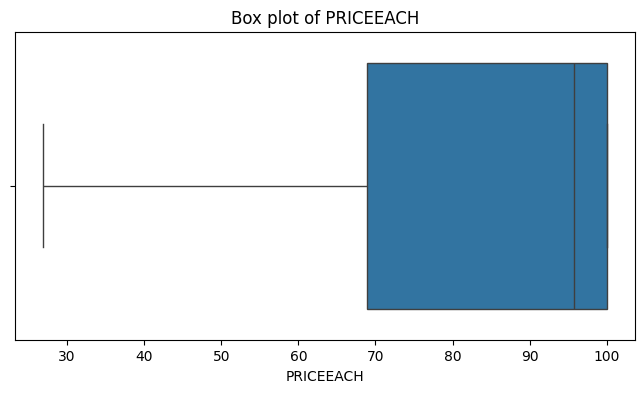

In [25]:
plot_boxplot(df, "PRICEEACH")

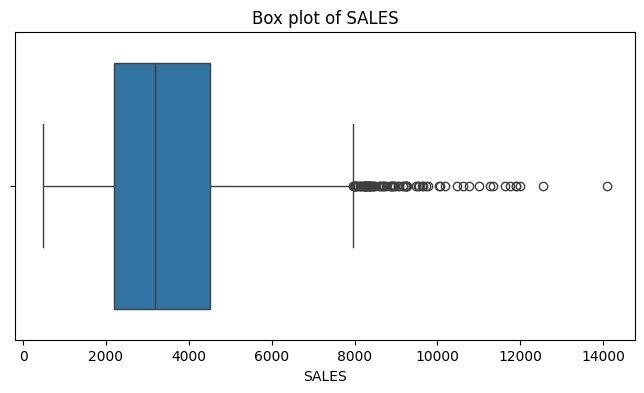

In [26]:
plot_boxplot(df, "SALES")

In [27]:
outliers = detect_outliers_iqr(df["SALES"])
print(outliers)
df["SALES"].iloc[outliers]

(array([  30,   32,   35,   41,   43,   44,   50,   53,   81,   86,   87,
         88,   90,   93,  104,  105,  131,  163,  164,  165,  174,  175,
        186,  188,  189,  191,  194,  195,  197,  198,  201,  203,  211,
        235,  239,  241,  243,  260,  264,  272,  290,  318,  319,  331,
        418,  473,  497,  563,  593,  598,  663,  667,  698,  744,  840,
        845, 1014, 1015, 1018, 1023, 1030, 1047, 1061, 1062, 1133, 1137,
       1153, 1188, 1251, 1558, 1561, 1666, 1839, 1995, 1996, 2117, 2241,
       2295, 2430, 2505, 2634]),)


30      10993.50
32       8014.82
35       9064.89
41       8014.82
43      10172.70
          ...   
2241     8844.12
2295     8209.44
2430     8977.05
2505    10066.60
2634     9558.80
Name: SALES, Length: 81, dtype: float64

In [28]:
df['CalculationTEST'] = df['QUANTITYORDERED'] * df['PRICEEACH']

In [33]:
results = df['SALES'] == df['CalculationTEST']
len(results[results == False])/len(df)

0.6011335458731846

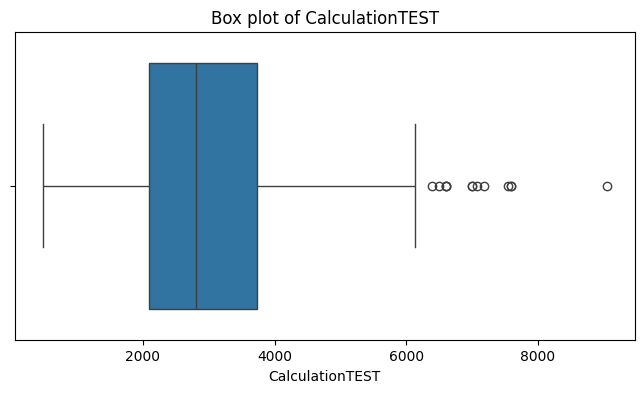

In [34]:
plot_boxplot(df, "CalculationTEST")

In [35]:
outliers = detect_outliers_iqr(df["CalculationTEST"])
print(outliers)
df["CalculationTEST"].iloc[outliers]

(array([  25,  104,  131,  264,  418,  598, 1188, 1666, 1714, 1995, 1996,
       2586, 2689]),)


25      6600.00
104     6600.00
131     6400.00
264     6600.00
418     9048.16
598     7600.00
1188    6500.00
1666    7000.00
1714    7182.00
1995    7600.00
1996    7000.00
2586    7543.75
2689    7084.00
Name: CalculationTEST, dtype: float64

In [36]:
df['SALES'] = df['CalculationTEST']
df.drop(columns=['CalculationTEST'], inplace=True)
df.head(3)

,ORDERNUMBER,PRODUCTCODE,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES
0,10107,S10_1678,30,95.70,2,2871.00
1,10121,S10_1678,34,81.35,5,2765.90
2,10134,S10_1678,41,94.74,2,3884.34


In [37]:
df.to_csv("../Database/order_items.csv", sep=",", encoding='Latin-1', index=False)